In [1]:
import yfinance as yf
import pandas as pd

data = yf.download("MSFT", start="2015-01-01", end="2025-01-01")
data

data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,40.072136,40.637739,39.883604,39.986440,27913900
2015-01-05,39.703636,40.046424,39.635077,39.737913,39673900
2015-01-06,39.120899,40.063570,39.026631,39.746490,36447900
2015-01-07,39.617931,39.815035,38.983772,39.403688,29114100
2015-01-08,40.783432,40.920548,40.037865,40.063573,29645200
...,...,...,...,...,...
2024-12-24,438.450836,438.720315,433.321138,433.780209,7164500
2024-12-26,437.233276,440.057630,435.756258,438.201337,8194200


In [2]:
data = data[['Close']]
data.rename(columns={'Close': 'price'}, inplace=True)

data['Return'] = data['price'].pct_change().dropna()

C:\Users\ROG\AppData\Local\Temp\ipykernel_16716\150717788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Close': 'price'}, inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_16716\150717788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['price'].pct_change().dropna()


In [3]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

data['Volatility'] = data['Return'].rolling(window=5).std()
data.dropna(inplace=True)

features = data[['Return', 'Volatility']].values

model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state=42)
model.fit(features)

hidden_states = model.predict(features)
data['Regime'] = hidden_states

C:\Users\ROG\AppData\Local\Temp\ipykernel_16716\2242996548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volatility'] = data['Return'].rolling(window=5).std()
C:\Users\ROG\AppData\Local\Temp\ipykernel_16716\2242996548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
Model is not converging.  Current: 16833.836682240984 is not greater than 16834.90222482923. Delta is -1.065542588246899
C:\Users\ROG\AppData\Local\Temp\ipykernel_16716\2242996548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [4]:
mean_returns = data.groupby('Regime')['Return'].mean().sort_values()
regime_map = {mean_returns.index[0]: 'Bearish', mean_returns.index[1]: 'Neutral', mean_returns.index[2]: 'Bullish'}
data['Market Regime'] = data['Regime'].map(regime_map)

C:\Users\ROG\AppData\Local\Temp\ipykernel_16716\2482725731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Regime'] = data['Regime'].map(regime_map)


In [5]:
# regime_means = pd.DataFrame({
#     'Regime': range(model.n_components),
#     'Mean Return': [features[data['Regime']==i][:,0].mean() for i in range(model.n_components)]
# }).sort_values(by='Mean Return')

# regime_order = regime_means["Regime"].tolist()
# regime_labels = {
#     regime_order[0]: "Bearish",
#     regime_order[1]: "Neutral",
#     regime_order[2]: "Bullish"
# }

# data["Market Regime"] = data["Regime"].map(regime_labels)

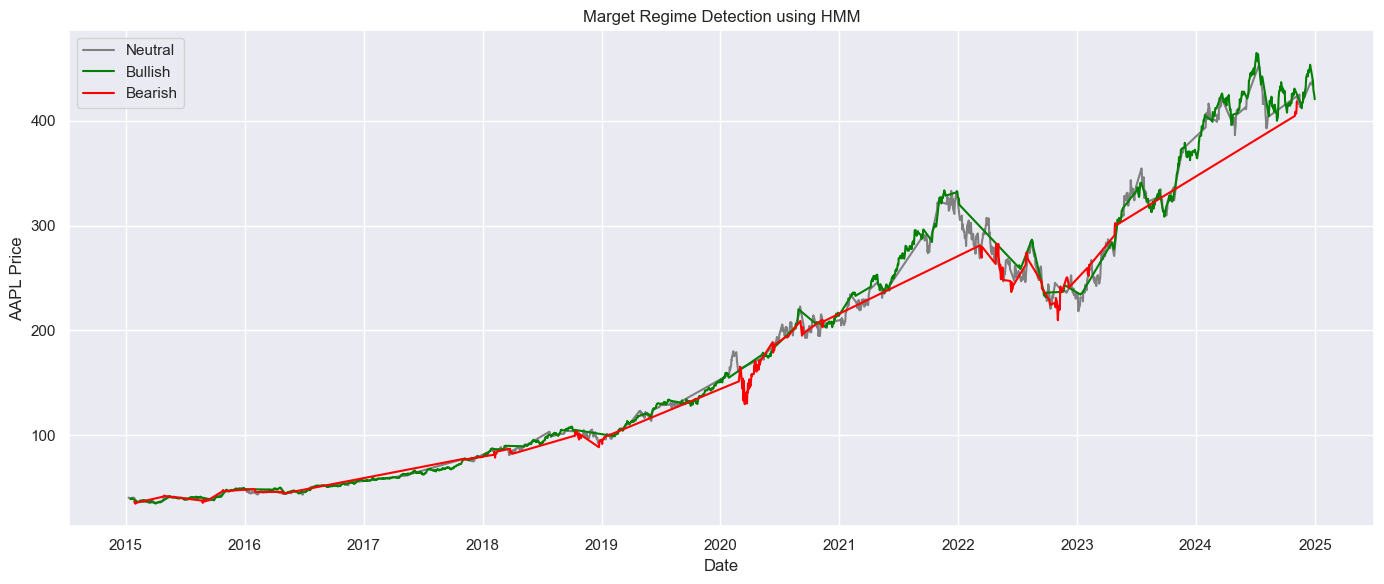

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

plt.figure(figsize=(14, 6))
colors = {'Bullish': 'green', 'Neutral': 'gray', 'Bearish': 'red'}

for regime in data["Market Regime"].unique():
    state_data = data[data["Market Regime"] == regime]
    plt.plot(state_data.index, state_data["price"], label=regime, color=colors[regime])

plt.legend()
plt.title("Marget Regime Detection using HMM")
plt.xlabel("Date")
plt.ylabel("AAPL Price")
plt.tight_layout()
plt.show()

In [7]:

data

Price,price,Return,Volatility,Regime,Market Regime
Ticker,MSFT,,,,
Date,,,,,
2015-01-09,40.440628,-0.008405,0.018562,0,Neutral
2015-01-12,39.935020,-0.012502,0.019110,0,Neutral
2015-01-13,39.729343,-0.005150,0.017527,0,Neutral
2015-01-14,39.386547,-0.008628,0.017232,0,Neutral
2015-01-15,38.975216,-0.010443,0.002723,1,Bullish
...,...,...,...,...,...
2024-12-24,438.450836,0.009374,0.017965,0,Neutral
2024-12-26,437.233276,-0.002777,0.005153,1,Bullish


In [8]:
data.to_csv('./data/hmm_regime.csv', index=True)